In [90]:
import pandas as pd
import warnings
from sklearn.utils import ConvergenceWarning
import numpy as np
import requests
import re
import os
import glob
import csv
import numpy as np
import scipy, scipy.stats
import sklearn
from sklearn import *
#lm=linear_model.LinearRegression()
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import math
#%matplotlib inline
from numpy import genfromtxt
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor
#from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from  sklearn.metrics import confusion_matrix,median_absolute_error
from sklearn.metrics import roc_curve, auc

In [91]:
homedir = os.path.expanduser("~")
path_to_midterm = homedir+"\\midterm"
print("Path: ",path_to_midterm)

Path:  C:\Users\Administrator\midterm


In [ ]:
def fillNAN(df):
    df['fico'] = df['fico'].fillna(0)
    df['flag_fthb']=df['flag_fthb'].fillna('X')
    df['cd_msa']=df['cd_msa'].fillna(0)
    df['mi_pct']=df['mi_pct'].fillna(0)
    df['cnt_units']=df['cnt_units'].fillna(0)
    df['occpy_sts']=df['occpy_sts'].fillna('X')
    df['cltv']=df['cltv'].fillna(0)
    df['dti']=df['dti'].fillna(0)
    df['ltv']=df['ltv'].fillna(0)
    df['channel']=df['channel'].fillna('X')
    df['ppmt_pnlty']=df['ppmt_pnlty'].fillna('X')
    df['prop_type']=df['prop_type'].fillna('XX')
    df['zipcode']=df['zipcode'].fillna(0)
    df['loan_purpose']=df['loan_purpose'].fillna('X')
    df['cnt_borr']=df['cnt_borr'].fillna(0)
    df['flag_sc']=df['flag_sc'].fillna('N')
    return df

In [ ]:
def changedatatype(df):
    #Change the data types for all column
    df[['fico','cd_msa','mi_pct','cnt_borr','cnt_units','cltv','dti','orig_upb','ltv','zipcode','orig_loan_term']] = df[['fico','cd_msa','mi_pct','cnt_borr','cnt_units','cltv','dti','orig_upb','ltv','zipcode','orig_loan_term']].astype('int64')
    df[['flag_sc','servicer_name']] = df[['flag_sc','servicer_name']].astype('str')
    return df

In [ ]:
'''
This function combines all the quarter and year data in single file
and preprocesses it
'''
dir_name = path_to_midterm+"\\"+"Data\\"+"historical_data"
def constructcsv(filename):
    writeHeader1 = True
    with open(filename, 'w',encoding='utf-8',newline="") as f:
        for subdir,dirs, files in os.walk(dir_name):
            for file in files:
                if 'time' not in file:
                    sample_df = pd.read_csv(os.path.join(subdir,file) ,sep="|",names=['fico','dt_first_pi','flag_fthb','dt_matr','cd_msa',"mi_pct",'cnt_units','occpy_sts','cltv','dti','orig_upb','ltv','int_rt','channel','ppmt_pnlty','prod_type','st', 'prop_type','zipcode','id_loan','loan_purpose', 'orig_loan_term','cnt_borr','seller_name','servicer_name','flag_sc'],skipinitialspace=True)
                    sample_df = fillNAN(sample_df)
                    sample_df = changedatatype(sample_df)
                    sample_df['Year'] = ['19'+x if x=='99' else '20'+x for x in (sample_df['id_loan'].apply(lambda x: x[2:4]))]
                    sample_df['Quater'] =sample_df['id_loan'].apply(lambda x: x[4:6])
                    if writeHeader1 is True:
                        sample_df.to_csv(f, mode='a', header=True,index=False)
                        writeHeader1 = False
                    else:
                        sample_df.to_csv(f, mode='a', header=False,index=False)
    
constructcsv('HistoricalOriginationCombined.csv')

In [92]:
def create_dumies(df):
    dummies = pd.get_dummies(df['flag_fthb']).rename(columns=lambda x: 'flag_fthb_' + str(x)) 
    train_df=pd.concat([df, dummies], axis=1) 
    dummies1 = pd.get_dummies(df['occpy_sts']).rename(columns=lambda x: 'occpy_sts_' + str(x)) 
    train_df=pd.concat([train_df, dummies1], axis=1) 
    dummies2 = pd.get_dummies(df['channel']).rename(columns=lambda x: 'channel_' + str(x)) 
    train_df=pd.concat([train_df, dummies2], axis=1) 
    dummies3 = pd.get_dummies(df['ppmt_pnlty']).rename(columns=lambda x: 'ppmt_pnlty_' + str(x)) 
    train_df=pd.concat([train_df, dummies3], axis=1) 
    dummies4 = pd.get_dummies(df['prop_type']).rename(columns=lambda x: 'prop_type_' + str(x)) 
    train_df=pd.concat([train_df, dummies4], axis=1) 
    dummies5 = pd.get_dummies(df['loan_purpose']).rename(columns=lambda x: 'loan_purpose_' + str(x)) 
    train_df=pd.concat([train_df, dummies5], axis=1) 
    dummies6 = pd.get_dummies(df['seller_name']).rename(columns=lambda x: 'seller_name_' + str(x)) 
    train_df=pd.concat([train_df, dummies6], axis=1) 
    train_df['flag_sc']=train_df['flag_sc'].map({'Y':1,'N':0}) 
    return train_df

In [93]:
def changedatatype(df):
    #Change the data types for all column
    df[['fico','cd_msa','mi_pct','cnt_borr','cnt_units','cltv','dti','orig_upb','ltv','zipcode','orig_loan_term']] = df[['fico','cd_msa','mi_pct','cnt_borr','cnt_units','cltv','dti','orig_upb','ltv','zipcode','orig_loan_term']].astype('int64')
    df[['flag_sc','servicer_name','seller_name']] = df[['flag_sc','servicer_name','seller_name']].astype('str')
    return df

In [94]:
def splitting(df,label):
    df_features = df.ix[:, df.columns != label]
    df_target = df.ix[:, df.columns == label]
    return df_features,df_target

In [99]:
def preprocessing(filename):
    for subdir,dirs, files in os.walk(path_to_midterm):
        for file in files:
            #print(file," ",filename)
            if filename == file: 
                hist_df = pd.read_csv(os.path.join(subdir,filename))
                hist_df=changedatatype(hist_df)
                hist_df=create_dumies(hist_df)
                Hist_numaric=hist_df
                Hist_numaric.drop('cd_msa',axis=1,inplace=True) 
                Hist_numaric.drop('flag_sc',axis=1,inplace=True) 
                Hist_numaric.drop('zipcode',axis=1,inplace=True)
                Hist_numaric.drop('prod_type',axis=1,inplace=True) #same values
                Hist_numaric.drop('id_loan',axis=1,inplace=True) #unique identifier
    return Hist_numaric

Hist_numaric = preprocessing('HistoricalOriginationCombined.csv')

In [101]:
def dataSplit(Hist_numaric,label,year,Q1,Q2):
    Hist_numeric_2005_Q1 = Hist_numaric[(Hist_numaric['Year']==year) & (Hist_numaric['Quater']==Q1)]
    Hist_numeric_2005_Q1=Hist_numeric_2005_Q1._get_numeric_data()

    Hist_numeric_2005_Q2 = Hist_numaric[(Hist_numaric['Year']==year) & (Hist_numaric['Quater']==Q2)]
    Hist_numeric_2005_Q2=Hist_numeric_2005_Q2._get_numeric_data()
    Hist_numeric_2005_Q1_features,Hist_numeric_2005_Q1_target = splitting(Hist_numeric_2005_Q1,label)
    Hist_numeric_2005_Q2_features,Hist_numeric_2005_Q2_target = splitting(Hist_numeric_2005_Q2,label)
    return Hist_numeric_2005_Q1_features,Hist_numeric_2005_Q1_target, Hist_numeric_2005_Q2_features,Hist_numeric_2005_Q2_target

In [102]:
year = int(input("Enter the year:"))
Q1   = input("Enter the traning quarter")
Q2   = input("Enter the testing quarter")
Hist_numeric_2005_Q1_features,Hist_numeric_2005_Q1_target, Hist_numeric_2005_Q2_features,\
Hist_numeric_2005_Q2_target = dataSplit(Hist_numaric,'int_rt',year,Q1,Q2)


Enter the year:2005
Enter the traning quarterQ1
Enter the testing quarterQ2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [111]:
def featureSelectionKSelect(selector,data):
    decision = selector.get_support()
    important_feature = []
    columns = list(data)
    iter=0
    for col in columns:
        if decision[iter]:
            print(col)
            important_feature.append(col)
        iter+=1
    data = data[important_feature]
    return data

In [114]:
def featureSelectionRFE(selector,data):
    decision = selector.support_
    important_feature = []
    columns = list(data)
    iter=0
    for col in columns:
        if decision[iter]:
            print(col)
            important_feature.append(col)
        iter+=1
    data_new = data.filter(important_feature,axis=1)
    return data_new

In [117]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE

def linear_regressor(training_feature,traning_label,testing_feature,testing_label):
    #Traning the linear regression model
    regr = linear_model.LinearRegression(fit_intercept=True)
    selector = RFE(regr, 5, step=1)
    selector.fit(training_feature, traning_label)
    regr.fit(training_feature, traning_label)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Testing the test data and finding the mean squared error
    actual_testing_label = regr.predict(testing_feature)
    actual_traning_label = regr.predict(training_feature)
    #print("Mean squared error:",np.mean(( actual_testing_label- testing_label) ** 2))
    MAE=mean_absolute_error(actual_testing_label,testing_label)
    print("MAE:",MAE)
    RMS=math.sqrt(mean_squared_error(actual_testing_label,testing_label))
    print("RMS:",RMS)
    #MAPE=mean_absolute_error(actual_testing_label,testing_label)*100
    MAPE=np.sum(np.absolute(actual_testing_label-testing_label)/np.absolute(testing_label))/testing_label.size*100
    print("MAPE:",MAPE)
    plt.scatter(actual_traning_label, traning_label, c="blue",alpha=0.5,  label="Training data")
    plt.scatter(actual_testing_label, testing_label, c="lightgreen",alpha=0.5, label="Validation data")
    plt.plot([4.7,7],[4.7,7], c = "red")
    plt.title("Linear regression with Ridge regularization")
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc="upper left")
    plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coefficients: 
 [[ -7.08749994e-04   3.65124625e-03  -2.03045067e-03   4.37611435e-03
    2.15136804e-02   1.02160680e-03  -5.92723622e-04  -6.74778096e-07
   -2.62384025e-05   1.95022075e-02  -2.39545451e-02  -5.62050406e-16
   -2.50091585e-02   3.73681681e-02  -1.23590096e-02   2.27391831e-01
   -1.26709042e-01  -1.00682789e-01   3.50325521e-02   3.35903524e-01
   -1.48649735e-01  -2.22286341e-01  -5.16581820e-02  -1.15103390e-01
    1.66761572e-01  -5.23463332e-02  -2.02338910e-02   1.65135910e-02
    2.08541392e-01  -7.24994516e-02  -6.38506694e-02  -1.61246381e-02
    2.90584574e-02   1.35399017e-02  -4.25983591e-02   1.46700070e-02
   -3.85405309e-02   5.55111512e-17   5.22750023e-02   7.75930655e-02
   -1.35439645e-02   5.37332471e-02  -5.48113316e-02   1.02784984e-01
   -1.25912761e-02  -4.33768856e-02  -4.53079472e-02  -7.50165135e-03
   -5.71664705e-02  -2.82162477e-02]]
MAE: 0.244775756921
RMS: 0.31777523384588524
MAPE: 4.18406989541


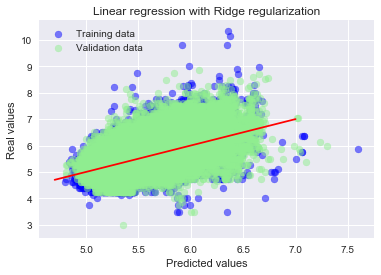

In [118]:
linear_regressor(Hist_numeric_2005_Q1_features.values,Hist_numeric_2005_Q1_target.values,
                 Hist_numeric_2005_Q2_features.values,Hist_numeric_2005_Q2_target.values)

In [8]:
def mape(actual_testing_label,testing_label):
    sum=0
    for iter in range(testing_label.size):
        sum+=math.fabs(testing_label-actual_testing_label)/math.fabs(testing_label)
    ans = sum/testing_label.size*100
    return ans

In [65]:
def random_forest(training_feature, traning_label, testing_feature, testing_label):
    regr = RandomForestRegressor(n_estimators=70, min_samples_split=2, max_depth=10)
    regr.fit(training_feature,traning_label)
    # The coefficients
    #print('Coefficients: \n', regr.coef_)
    # Testing the test data and finding the mean squared error
    actual_testing_label = regr.predict(testing_feature)
    actual_traning_label = regr.predict(training_feature)
    # print("Mean squared error:", np.mean(actual_testing_label - testing_label) ** 2)
    MAE=mean_absolute_error(actual_testing_label,testing_label)
    print("MAE:",MAE)
    RMS=math.sqrt(mean_squared_error(actual_testing_label,testing_label))
    print("RMS:",RMS)
    #MAPE=mape(actual_testing_label,testing_label)
    MAPE=median_absolute_error(actual_testing_label,testing_label)*10
    print("MAPE:",MAPE)
    plt.scatter(actual_traning_label, traning_label, c="blue", marker="s", label="Training data")
    plt.scatter(actual_testing_label, testing_label, c="lightgreen", marker="s", label="Validation data")
    plt.title("Linear regression with Ridge regularization")
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc="upper left")
    plt.show()
    return MAE,RMS,MAPE

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MAE: 0.230666311219
RMS: 0.3023359406768018
MAPE: 0.183318973414


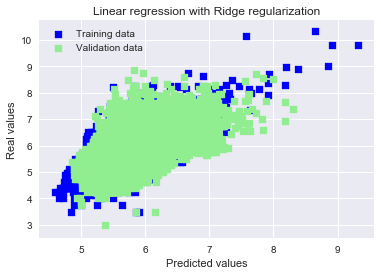

In [21]:
random_forest(Hist_numeric_2005_Q1_features.values,Hist_numeric_2005_Q1_target.values,
              Hist_numeric_2005_Q2_features.values,Hist_numeric_2005_Q2_target.values)

In [10]:
'''
This is a neural network model designed to predict the interest rate of the 
data
'''
def Neural_network(training_feature, traning_label, testing_feature, testing_label):
    regr = MLPRegressor(hidden_layer_sizes=(2, ), activation='logistic', solver='adam', alpha=0.00001, batch_size='auto',
                        learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True,
                        random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
                        nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9,
                        beta_2=0.999, epsilon=1e-08)

    regr.fit(training_feature, traning_label)
    # The coefficients
    # print('Coefficients: \n', regr.coef_)
    # Testing the test data and finding the mean squared error
    actual_testing_label = regr.predict(testing_feature)
    actual_traning_label = regr.predict(training_feature)
    MAE=mean_absolute_error(actual_testing_label,testing_label)
    print("MAE:",MAE)
    RMS=math.sqrt(mean_squared_error(actual_testing_label,testing_label))
    print("RMS:",RMS)
    MAPE=mean_absolute_error(actual_testing_label,testing_label)*100
    #MAPE=np.sum(np.absolute(actual_testing_label-testing_label)/np.absolute(testing_label))/testing_label.size*100
    print("MAPE:",MAPE)


Neural_network(Hist_numeric_2005_Q1_features,Hist_numeric_2005_Q1_target,Hist_numeric_2005_Q2_features,Hist_numeric_2005_Q2_target)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 0.294023535255
RMS: 0.3792092869972201
MAPE: 29.4023535255


In [68]:
newDF = pd.DataFrame(columns=['Quarter','MAE','RMS','MAPE'])

In [84]:
'''
This function computes the regression error values to check the
financial crisis
Parameters:
year: The year of which you want to process the data
fileName: name of the file contaning the data
'''
def financialCrisis(year, fileName):
    constructcsv(fileName)
    print("Process started")
    First_data = preprocessing(fileName)
    #print(First_data.head())

    print("Preprocessing done")
    traning_x,traning_Y,testing_X,testing_Y=dataSplit(First_data,'int_rt',year,'Q1','Q2')
    MAE,RMS,MAPE = random_forest(traning_x,traning_Y,testing_X,testing_Y)
    newDF.loc[len(newDF.index)]=[str('Q2')+str(year),MAE,RMS,MAPE]
    print("Quarter2 done")
    traning_x,traning_Y,testing_X,testing_Y=dataSplit(First_data,'int_rt',year,'Q2','Q3')
    MAE,RMS,MAPE = random_forest(traning_x,traning_Y,testing_X,testing_Y)
    newDF.loc[len(newDF.index)]=[str('Q3')+str(year),MAE,RMS,MAPE]
    print("Quarter3 done")
    traning_x,traning_Y,testing_X,testing_Y=dataSplit(First_data,'int_rt',year,'Q3','Q4')
    MAE,RMS,MAPE = random_forest(traning_x,traning_Y,testing_X,testing_Y)
    newDF.loc[len(newDF.index)]=[str('Q4')+str(year),MAE,RMS,MAPE]
    print("Quarter4 done")
    traning_x,traning_Y,_,_=dataSplit(First_data,'int_rt',year,'Q1','Q1')
    _,_,testing_X,testing_Y=dataSplit(First_data,'int_rt',year,'Q1','Q1')
    MAE,RMS,MAPE = random_forest(traning_x,traning_Y,testing_X,testing_Y)
    newDF.loc[len(newDF.index)]=[str('Q1')+str(year),MAE,RMS,MAPE]
    print("Completed",year,"!")
    
                                 
                                 
                             
    
    

In [ ]:
newDF = pd.DataFrame(columns=['Quarter','MAE','RMS','MAPE'])

Process started
Preprocessing done


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MAE: 0.180190373822
RMS: 0.23766117762145814
MAPE: 1.39590834903


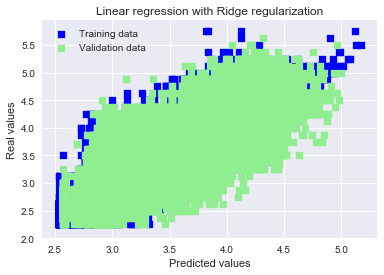

Quarter2 done


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MAE: 0.395370368781
RMS: 0.49947088349746815
MAPE: 3.22098964475


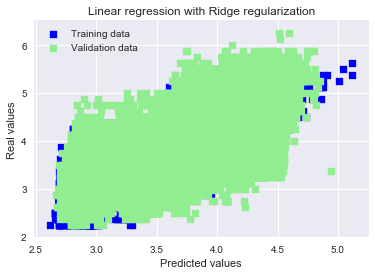

Quarter3 done


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MAE: 0.2145643829
RMS: 0.2689299959730703
MAPE: 1.83683673452


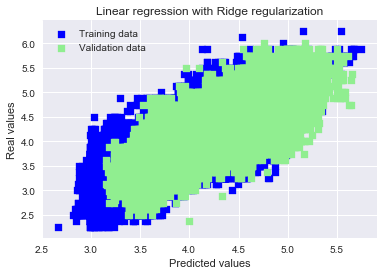

Quarter4 done


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MAE: 0.150880337733
RMS: 0.1997103709880433
MAPE: 1.12452318816


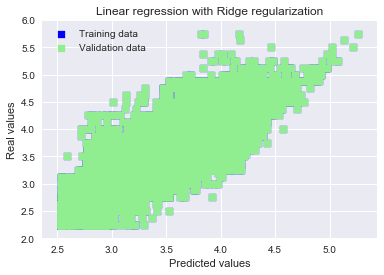

Completed 2013 !


In [85]:

#financialCrisis(2007,"HistoricalFinancialCrisis.csv")
#financialCrisis(2009,"HistoricalFinancialCrisis.csv")

#financialCrisis(1999,"EconomicBoom.csv")
#financialCrisis(2013,"EconomicBoom.csv")
  

In [88]:
#with open("EconomicBoomResult.csv", 'a',encoding='utf-8',newline="") as f:
#    newDF.to_csv(f,index=False,header=False)  

In [87]:
#newDF

,Quarter,MAE,RMS,MAPE
0,Q12000,0.208241,0.286568,1.560747
1,Q22013,0.180190,0.237661,1.395908
2,Q32013,0.395370,0.499471,3.220990
3,Q42013,0.214564,0.268930,1.836837
4,Q12013,0.150880,0.199710,1.124523
